<a href="https://colab.research.google.com/github/Davioliveira1305/Machine-Learning/blob/main/DAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descrição

**O conjunto de dados Z-Alizadeh Sani é um dos conjuntos de dados mais comuns usados ​​em aprendizado de máquina para detecção automática de CAD. Este conjunto de dados contém 303 amostras ( 216 pacientes com DAC e 87 normais) com 55 características. As principais características deste conjunto de dados são quatro categorias: (1) Demográficas , (2) sintomas e exames , (3) eletrocardiograma e (4) características laboratoriais e ecográficas.**

In [62]:
import pandas as pd

In [63]:
data = pd.read_csv('/content/CAD.csv')

In [64]:
data.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


##Análise exploratória dos dados e pré-processamento.

**Tipos dos dados.**

In [65]:
data.dtypes

Age                        int64
Weight                     int64
Length                     int64
Sex                       object
BMI                      float64
DM                         int64
HTN                        int64
Current Smoker             int64
EX-Smoker                  int64
FH                         int64
Obesity                   object
CRF                       object
CVA                       object
Airway disease            object
Thyroid Disease           object
CHF                       object
DLP                       object
BP                         int64
PR                         int64
Edema                      int64
Weak Peripheral Pulse     object
Lung rales                object
Systolic Murmur           object
Diastolic Murmur          object
Typical Chest Pain         int64
Dyspnea                   object
Function Class             int64
Atypical                  object
Nonanginal                object
Exertional CP             object
LowTH Ang 

**Verificando se existem valores nulos no dataframe, observem que não existem valores nulos nas colunas do dataframe.**

In [66]:
data.isnull().sum()

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
F

###Transformando dados categóricos em dados numéricos

In [67]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
vetor_colunas = []
colunas_modificadas = []
for i in data.columns:
  if data[i].dtype == object:
    vetor_colunas.append(i)
    colunas_modificadas.append(i)
for j in vetor_colunas:
  data[j] = label_encoder.fit_transform(data[j])

In [68]:
print(f'Colunas que tiveram o tipo modificadas para inteiro: {colunas_modificadas}')

Colunas que tiveram o tipo modificadas para inteiro: ['Sex', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'LVH', 'Poor R Progression', 'VHD', 'Cath']


###Verificando a quantidade de elementos distintos em cada coluna

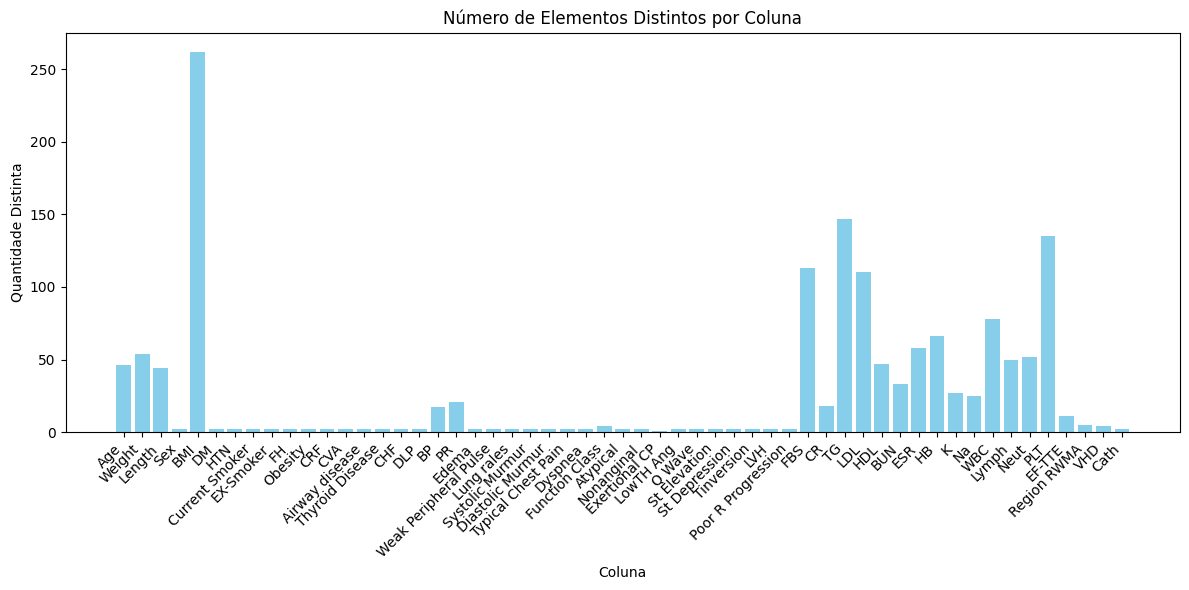

In [69]:
import matplotlib.pyplot as plt
import numpy
colunas_do_dataframe = data.columns
colunas = []
qtde_dist = []
colunas_binarias = []
colunas_continuas = []
for i in colunas_do_dataframe:
  num_elementos_diferentes = len(data[i].unique())
  if num_elementos_diferentes <= 2:
    colunas_binarias.append(i)
  else:
    colunas_continuas.append(i)
  colunas.append(i)
  qtde_dist.append(num_elementos_diferentes)
plt.figure(figsize=(12, 6))
plt.bar(colunas, qtde_dist, color='skyblue')
plt.xlabel('Coluna')
plt.ylabel('Quantidade Distinta')
plt.title('Número de Elementos Distintos por Coluna')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

###O dataframe possui muitas colunas binárias, ou seja, que só possuem dois elementos distintos

In [70]:
print(f'Colunas Binárias:{colunas_binarias}')

Colunas Binárias:['Sex', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion', 'LVH', 'Poor R Progression', 'Cath']


In [71]:
data.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,1,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,1,0
1,67,70,157,0,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,1,0
2,54,54,164,1,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,3,0
3,66,67,158,0,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,2,1
4,50,87,153,0,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,2,1


In [72]:
data.dtypes

Age                        int64
Weight                     int64
Length                     int64
Sex                        int64
BMI                      float64
DM                         int64
HTN                        int64
Current Smoker             int64
EX-Smoker                  int64
FH                         int64
Obesity                    int64
CRF                        int64
CVA                        int64
Airway disease             int64
Thyroid Disease            int64
CHF                        int64
DLP                        int64
BP                         int64
PR                         int64
Edema                      int64
Weak Peripheral Pulse      int64
Lung rales                 int64
Systolic Murmur            int64
Diastolic Murmur           int64
Typical Chest Pain         int64
Dyspnea                    int64
Function Class             int64
Atypical                   int64
Nonanginal                 int64
Exertional CP              int64
LowTH Ang 

###Análise das colunas que foram modificadas de categóricas para inteiras

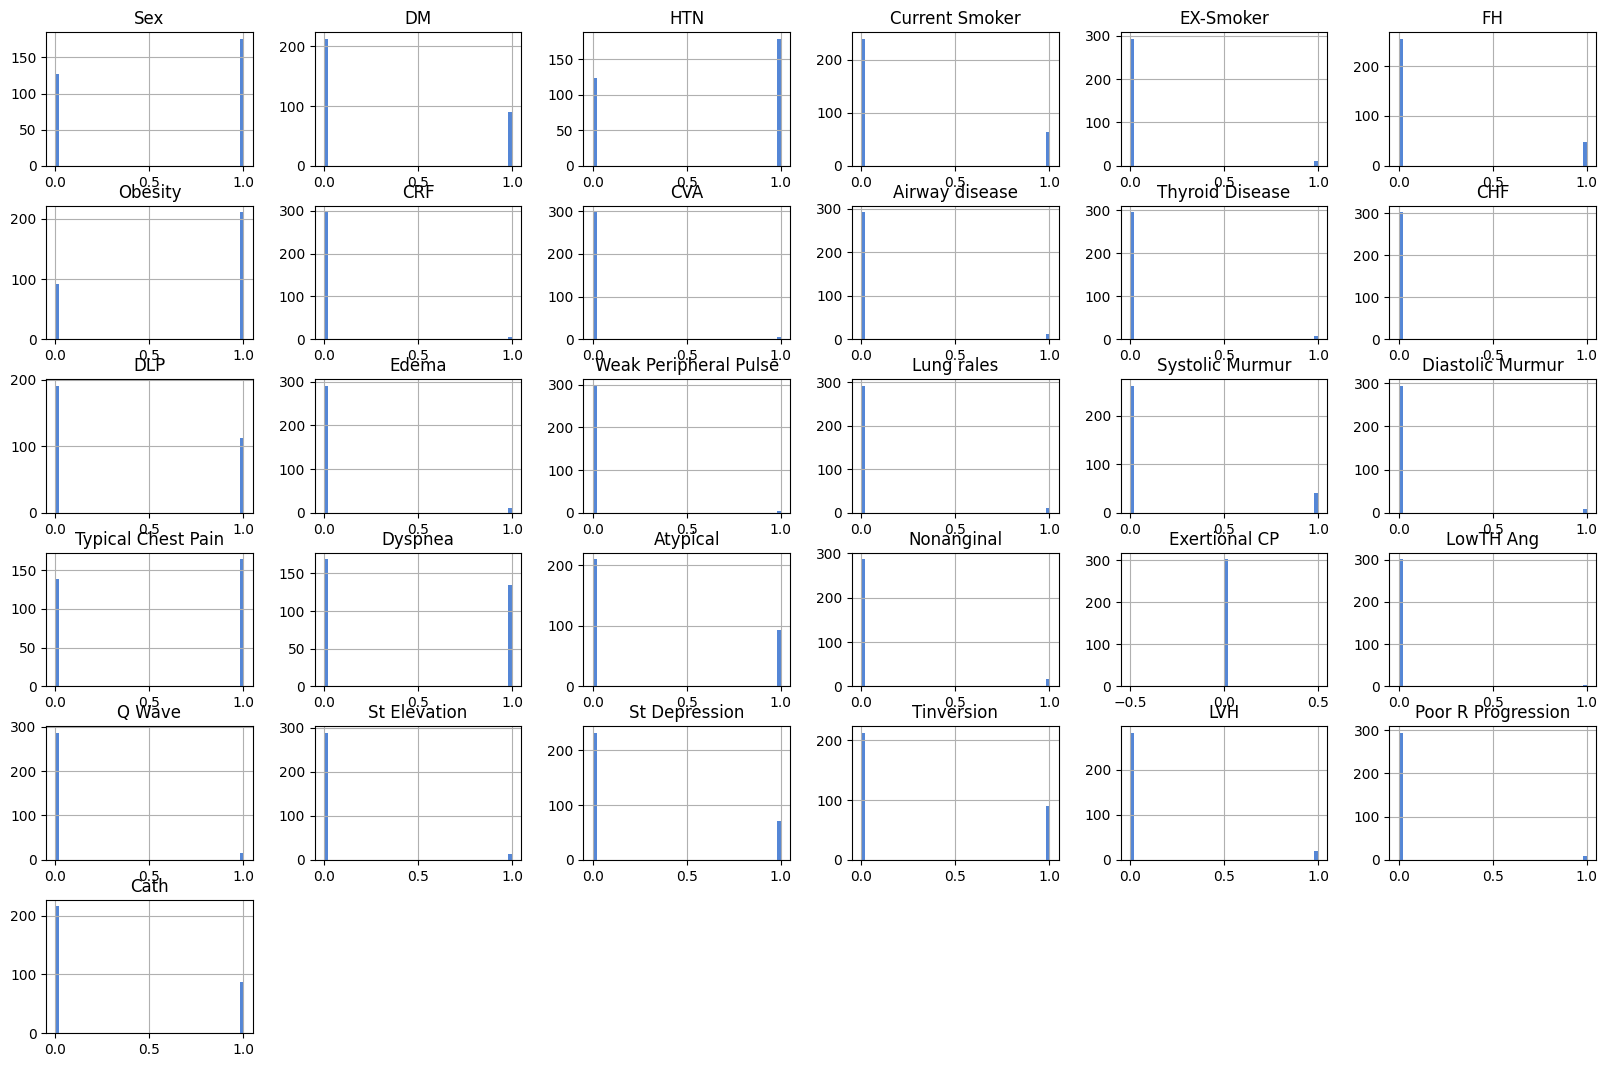

In [73]:
import matplotlib.pyplot as plt
data_binarias = data[colunas_binarias]
data_binarias.hist(bins=50, figsize=(20,13), color='#5486d6') # Retirando o atributo de ID do passageiro
plt.show()

###Histograma das colunas contínuas

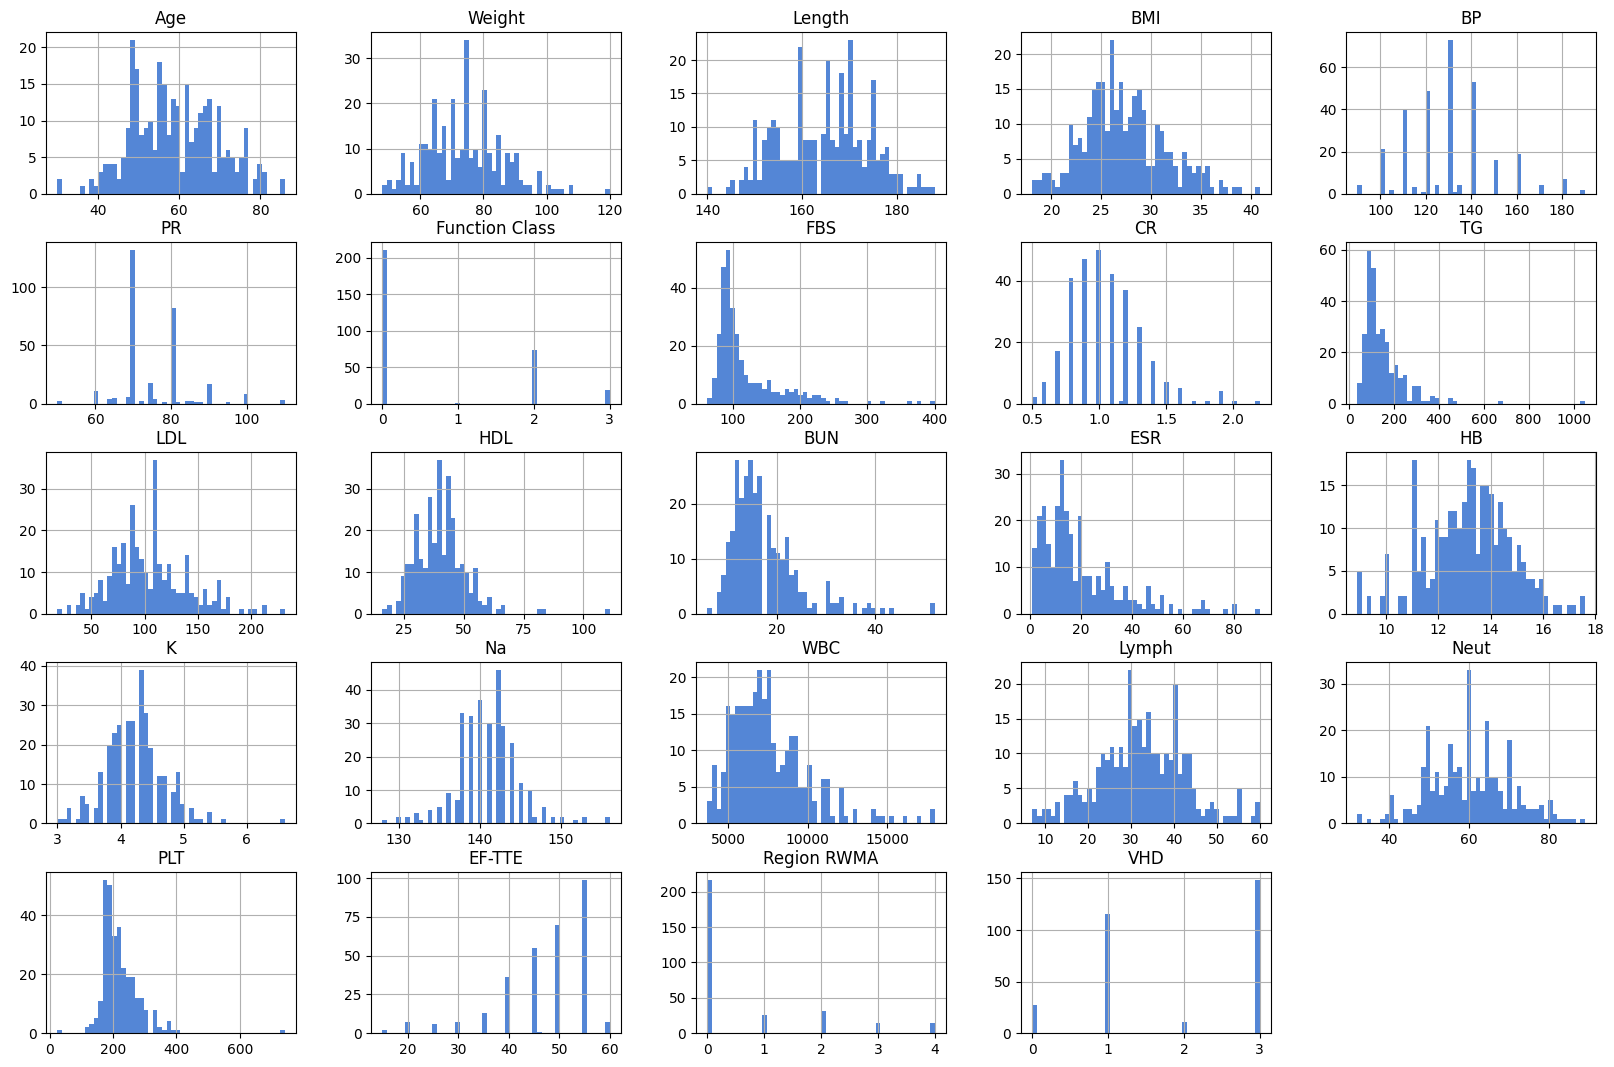

In [74]:
data_continuas = data[colunas_continuas]
data_continuas.hist(bins=50, figsize=(20,13), color='#5486d6') # Retirando o atributo de ID do passageiro
plt.show()

###Normalidade das colunas contínuas

**Note que somente 3 colunas do dataframe segue uma distribuição normal**

In [75]:
from scipy.stats import shapiro
for i in colunas_continuas:
  stat, p_value = shapiro(data[i])
  if p_value > 0.05:
      print(f'A coluna {i} provavelmente segue uma distribuição normal--p_value = {p_value}--Estatística do teste = {stat}')
  else:
      print(f'A coluna {i} provavelmente NÃO segue uma distribuição normal--p_value = {p_value}--Estatística do teste = {stat}')


A coluna Age provavelmente NÃO segue uma distribuição normal--p_value = 0.03161336109042168--Estatística do teste = 0.9897385239601135
A coluna Weight provavelmente NÃO segue uma distribuição normal--p_value = 0.007979177869856358--Estatística do teste = 0.9870180487632751
A coluna Length provavelmente NÃO segue uma distribuição normal--p_value = 0.024479975923895836--Estatística do teste = 0.989240288734436
A coluna BMI provavelmente NÃO segue uma distribuição normal--p_value = 0.004062797408550978--Estatística do teste = 0.9856399297714233
A coluna BP provavelmente NÃO segue uma distribuição normal--p_value = 4.03775786139704e-08--Estatística do teste = 0.9543012976646423
A coluna PR provavelmente NÃO segue uma distribuição normal--p_value = 6.633648111309604e-16--Estatística do teste = 0.8601563572883606
A coluna Function Class provavelmente NÃO segue uma distribuição normal--p_value = 3.5481888693857747e-25--Estatística do teste = 0.6264820694923401
A coluna FBS provavelmente NÃO s

###Associação entre as colunas binárias e a coluna alvo(Cath)

**Teste Qui-Quadrado**

In [76]:
import pandas as pd
from scipy.stats import chi2_contingency
binarias_associadas = [] # Vetor que vai guardar as colunas que passarem no teste Qui-Quadrado
for coluna in colunas_binarias:
  if coluna == 'Cath': continue #Ignora a própria variável alvo
  # Crie uma tabela de contingência
  contingency_table = pd.crosstab(data[coluna], data['Cath'])

  # Calcule o teste qui-quadrado de independência
  chi2, p_val, dof, expected = chi2_contingency(contingency_table)

  print(f'\nTabela de Contingência para {coluna}:')
  print(contingency_table)
  print('\nResultado do Teste Qui-Quadrado:')
  print('Valor de Qui-Quadrado:', chi2)
  print('Valor p:', p_val)

  if p_val > 0.05:
      print(f'As proporções para {coluna} são provavelmente homogêneas (p-valor > 0.05)')
      binarias_associadas.append(coluna)
  else:
      print(f'As proporções para {coluna} não são homogêneas (p-valor <= 0.05)')



Tabela de Contingência para Sex:
Cath    0   1
Sex          
0      86  41
1     130  46

Resultado do Teste Qui-Quadrado:
Valor de Qui-Quadrado: 1.0780799559452123
Valor p: 0.29912748032994074
As proporções para Sex são provavelmente homogêneas (p-valor > 0.05)

Tabela de Contingência para DM:
Cath    0   1
DM           
0     136  77
1      80  10

Resultado do Teste Qui-Quadrado:
Valor de Qui-Quadrado: 18.174948228643895
Valor p: 2.0151216696088066e-05
As proporções para DM não são homogêneas (p-valor <= 0.05)

Tabela de Contingência para HTN:
Cath    0   1
HTN          
0      69  55
1     147  32

Resultado do Teste Qui-Quadrado:
Valor de Qui-Quadrado: 23.81341862168911
Valor p: 1.0613994174234381e-06
As proporções para HTN não são homogêneas (p-valor <= 0.05)

Tabela de Contingência para Current Smoker:
Cath              0   1
Current Smoker         
0               167  73
1                49  14

Resultado do Teste Qui-Quadrado:
Valor de Qui-Quadrado: 1.2611779376102294
Valor 

**Colunas que passaram no teste Qui-Quadrado**

In [77]:
print(f'Colunas que passaram no teste: {binarias_associadas}')
print(f'{len(binarias_associadas)} colunas passaram no teste em um total de {len(colunas_binarias)} colunas')

Colunas que passaram no teste: ['Sex', 'Current Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Exertional CP', 'LowTH Ang', 'LVH', 'Poor R Progression']
19 colunas passaram no teste em um total de 31 colunas


###Associação entre as colunas contínuas e a variável alvo(Cath)

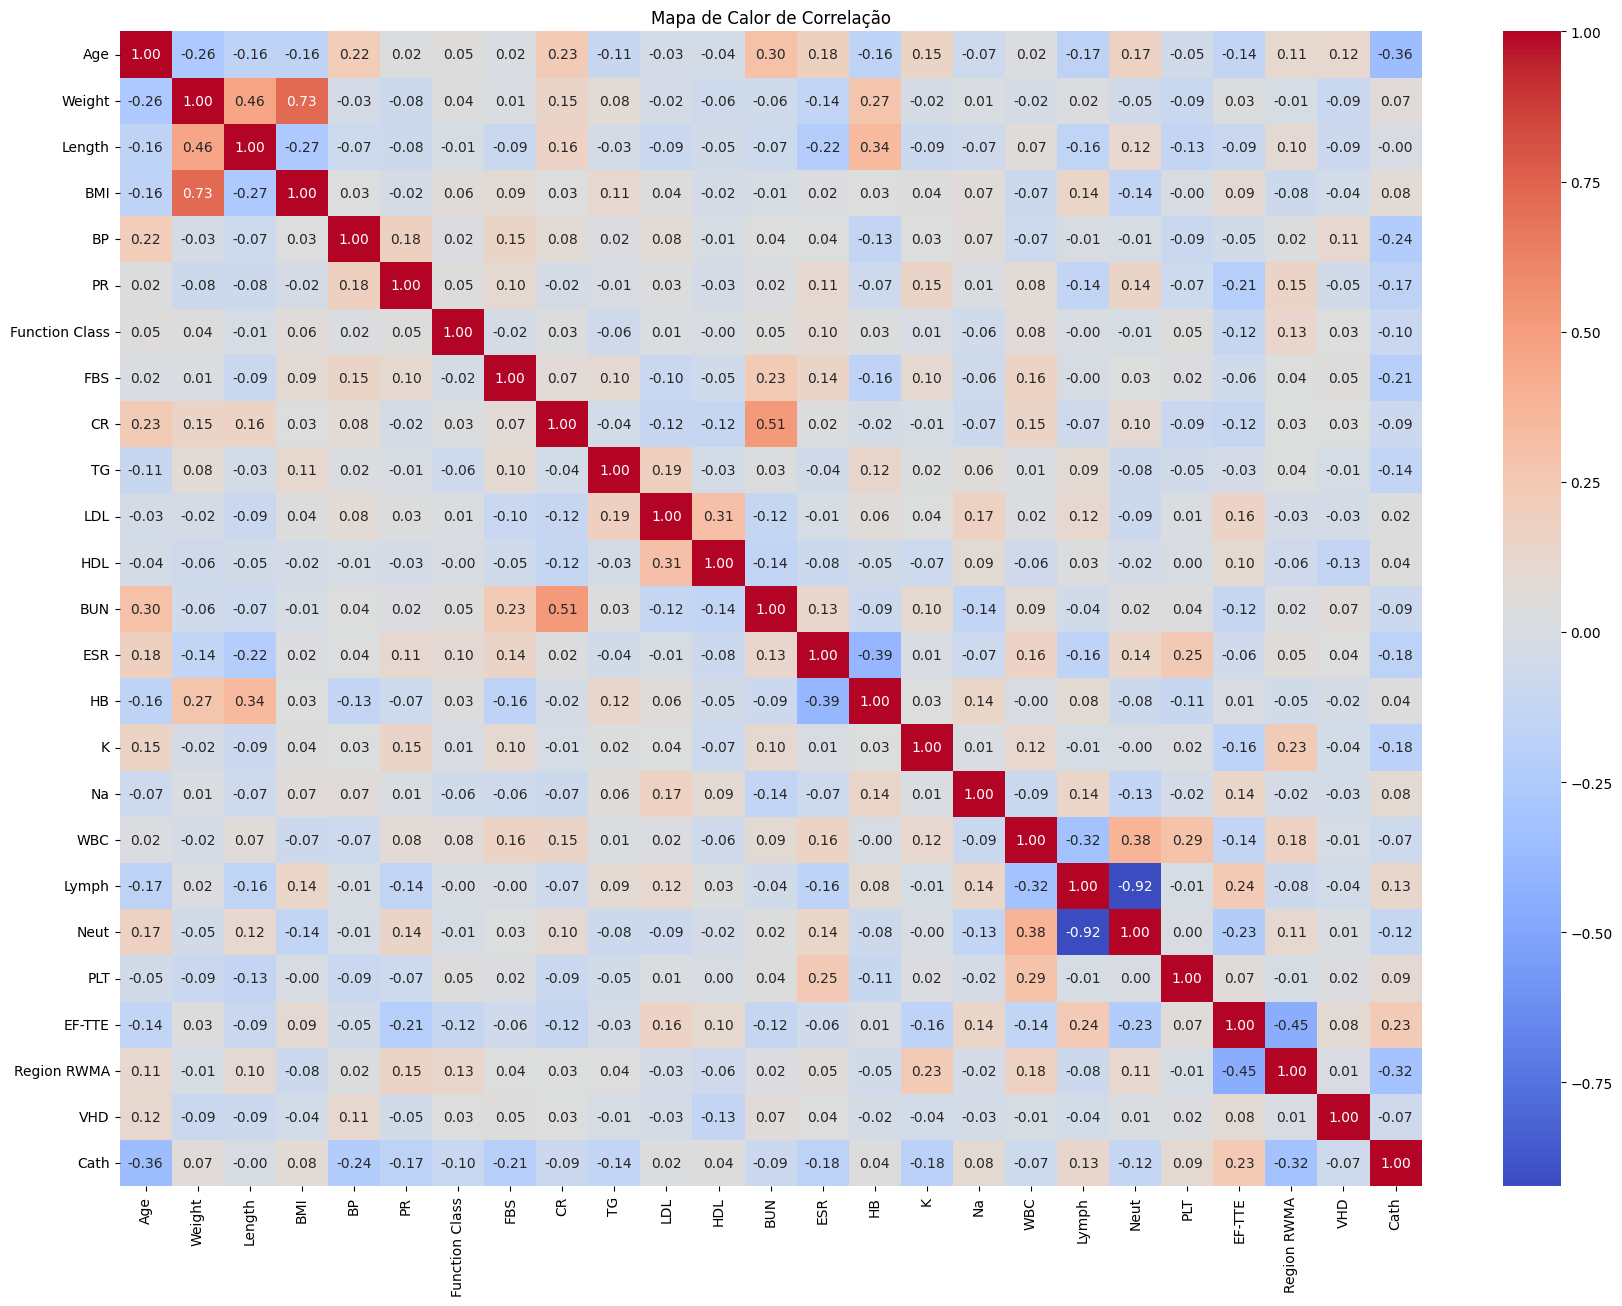

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
colunas_continuas.append('Cath')
data_continuas = data[colunas_continuas]
correlation_matrix = data_continuas.corr()
plt.figure(figsize=(21, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlação')
plt.show()

**Foram selecionadas as colunas que possuem 0.2 em módulo de correlação com a coluna alvo(Cath), uma correlação de 0.2 em módulo representa uma correlação de fraca a moderada em relação a coluna alvo.**

In [79]:
def selecao_cor(data, target_column, correlation_threshold):
    corr = data.corr()[target_column]
    selecionadas = corr[corr.abs() > correlation_threshold].index
    return selecionadas

corr = 0.20 # Taxa de correlação
colunas_selecionadas = selecao_cor(data_continuas, 'Cath', corr)
print(f'As colunas {colunas_selecionadas} foram selecionadas')

As colunas Index(['Age', 'BP', 'FBS', 'EF-TTE', 'Region RWMA', 'Cath'], dtype='object') foram selecionadas


###Mesclagem

In [83]:
continuas_associadas = []
for i in colunas_selecionadas:
  continuas_associadas.append(i)
selecionadas = continuas_associadas + binarias_associadas
selecionadas.append('Cath')
data = data[selecionadas]
display(data.head())

,Age,BP,FBS,EF-TTE,Region RWMA,Cath,Sex,Current Smoker,EX-Smoker,FH,...,DLP,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Exertional CP,LowTH Ang,LVH,Poor R Progression,Cath
0,53,110,90,50,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,67,140,80,40,4,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,54,100,85,40,2,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,66,100,78,55,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,50,110,104,50,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [82]:
len(selecionadas)

25

#Machine learning

**Como o dataframe possui muitas colunas a eliminação de  algumas colunas que não tem uma correlação linear com a variável alvo séria uma opção para diminuir a complexidade do problema. Note que deve-se também analisar outros tipos de correlação entre as variáveis, mas por questão de teste vou eliminar primeiramente essas colunas não possuem essa de correlação de linearidade com a variável alvo, se os algoritmos de Machine Learning não tiverem uma boa acurácia, uma opção seria analisar essas correlações não lineares e outras estatísticas de correlação, como testes de hipóteses e etc.**

In [81]:
print(selected_features)

NameError: ignored

In [ ]:
colunas_desejadas = ['Age', 'DM', 'HTN', 'BP', 'Typical Chest Pain', 'Atypical', 'Nonanginal', 'Tinversion', 'FBS', 'EF-TTE', 'Region RWMA', 'Cath']
data = data[colunas_desejadas]

In [ ]:
data

## Criando um classificador de árvore de decisão

In [84]:
x = data.drop(data.columns[[-1]], axis=1).values
y = data.iloc[:,-1].values

**Divindindo entre conjunto de testes e conjunto de treinamento**

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 55)

**Padronização do conjunto de testes e treinamento**

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Classificador de árvore de decisão**

In [87]:
from sklearn.tree import DecisionTreeClassifier
classifier_Ad = DecisionTreeClassifier(criterion = 'entropy', random_state = 55)
classifier_Ad.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=55)

**Plot da árvore de decisão gerada pelo classificador**

In [ ]:
from sklearn.tree import plot_tree
plot_tree(classifier_Ad)

**Predições**

In [88]:
predictions = classifier_Ad.predict(X_test)

**A acurácia da árvore de decisão saiu-se relativamente boa.**

In [89]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
print("Accuracy: ", accuracy_score(y_test,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.6813186813186813


              precision    recall  f1-score   support

           0       0.68      0.89      0.77        55
           1       0.68      0.36      0.47        36

    accuracy                           0.68        91
   macro avg       0.68      0.63      0.62        91
weighted avg       0.68      0.68      0.65        91



[[49  6]
 [23 13]]
